In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Differentiable Maps and Cob Web Plots

So, lets suppose we have a map $f \in C^{1}(I)$, where $I$ is some interval of the real line.  Unlike with our example involving $C_{3,1}(x)$, it is not such a simple thing to establish for an arbitrary map what happens to a point $x_{0}\in I$ as we iterate with $f(x)$.  

To help us in this endeavour, we fall back on graphical and analytic tricks to provide insight.  To wit, we start our study with the concept of a fixed point.  

> **Fixed Point of a Map**: We say a point $x_{\ast}\in I$ is a fixed point of $f$ if $f(x_{\ast}) = x_{\ast}$.

Now, what we can do with this is help us characterize what occurs nearby a fixed point.  To wit, suppose that 

$$
\left|f'(x_{\ast})\right| < 1.
$$

Now, suppose that $x_{0}\in I$, and $x_{0}$ starts _ close _ to $x_{\ast}$.  Since $f'(x)$ is assumed continuous on $I$, and we started _ close _ to $x_{\ast}$, then we can suppose that $|f'(x)|\leq M < 1$ for all $x\in (\min(x_{0},x_{\ast}),\max(x_{0},x_{\ast}))$.  So, by the Mean Value Theorem, we then have 

$$
\frac{\left|f(x_{0})-f(x_{\ast}) \right|}{|x_{0}-x_{\ast}|} = \left|f'(\xi) \right|, ~ \xi \in (\min(x_{0},x_{\ast}),\max(x_{0},x_{\ast})).
$$

Sorry, I know I keep saying I'm going to chill on the analysis, and I really mean it, I will, but we need just a bit more to keep going.  So by the Mean Value Theorem, I mean 

**Mean Value Theorem**: For $f \in C([a,b])$, and $f$ differentiable on $(a,b)$, there exists a point $\xi\in(a,b)$ such that 

$$
f'(\xi) = \frac{f(b)-f(a)}{b-a}.
$$

![MVT](https://upload.wikimedia.org/wikipedia/commons/9/94/Mittelwertsatz3.svg)



_ Problem _: From this, letting $x_{n} = f(x_{n-1}) = f^{(n)}(x_{0})$, show that 

$$
0\leq \left|x_{n} - x_{\ast} \right| \leq M^{n}\left|x_{0} - x_{\ast} \right|
$$
and thus
$$
\lim_{n\rightarrow \infty} f^{(n)}(x_{0}) = x_{\ast}
$$

So we see that if for a fixed point $x_{\ast}$ that $\left|f'(x_{\ast})\right|<1$, then there is some non-trivial neighborhood around $x_{\ast}$, say $S(x_{\ast})$ such that if $x_{0}\in S(x_{\ast})$, then 

$$
\lim_{n\rightarrow \infty} f^{(n)}(x_{0}) = x_{\ast}.
$$

This attractive property of the fixed point makes it _ stable _ i.e. perturbing away from the fixed point does not fundamentally alter the dynamics.  Actually, we should emphasize that what we have really shown in _ asymptotic stability _, i.e. we not only stay close to $x_{\ast}$, but we actually get closer in the limit.  

_ Problem _: How would you characterize a fixed point $x_{\ast}$ for which $\left|f'(x_{\ast})\right|>1$?  Note, use the work above to show that there must be a way to chose $x_{0}$ close enough to $x_{\ast}$ such that 

$$
\left|x_{1}- x_{\ast} \right| \geq M |x_{0}-x_{\ast}|, ~ M>1.
$$

So as we see, if $|f'(x_{\ast})|>1$, then we describe the fixed point as unstable, i.e. there is a neighborhood of nearby points to $x_{\ast}$ that move away from the fixed point.  We also describe the fixed point as repellant. 

To illustrate these concepts, we now introduce the idea of a cobweb plot.  So, let's start with our soon to be best friend, the logistic map $L_{\alpha}(x)$, where 

$$
L_{\alpha}(x) = \alpha x(1-x), ~ \alpha > 0.  
$$

We readily see the fixed points of this map are $x_{\ast}=0$ and $x_{\ast} = 1 - 1/\alpha$.  If we then look at 

$$
L'_{\alpha}(x) = \alpha(1-2x), 
$$

then $\left|L'_{\alpha}(0)\right|= |\alpha|<1$, or we have that $x_{\ast}=0$ is stable for $\alpha<1$.  Likewise, 

$$
\left|L'_{\alpha}\left(1-\frac{1}{\alpha}\right)\right| = \left|\alpha-2\right|,
$$

so that the other fixed point is unstable if $\alpha<1$ or $\alpha>3$, and stable if $1<\alpha < 3$.  This is also your first example in this class of a bifurcation, but we'll fuss about that in a bit.  So, to understand the impact of all this, we now generate what are called _ cobweb plots _.  

In [21]:
def log_cobweb(x0,aval,niter):
    xvals = np.linspace(0,1,int(1e4))
    yvals = aval*xvals*(1.-xvals)
    
    #Plot the logistic function
    plt.plot(xvals,yvals,ls='--',color='k')
    
    #Plot the line y=x
    plt.plot(xvals,xvals,ls='--',color='k')
    
    La = lambda x: aval*x*(1.-x)
    x1 = La(x0) 
    for jj in xrange(0,niter):
        plt.plot([x0,x0],[x0,x1],color='k')
        plt.plot([x0,x1],[x1,x1],color='k')
        x0 = x1
        x1 = La(x0)
        
    plt.xlim((0.,1.))
    plt.ylim((0.,aval/4.+.05))
    plt.xlabel('$x_{n}$')
    plt.ylabel('$x_{n+1}$')  

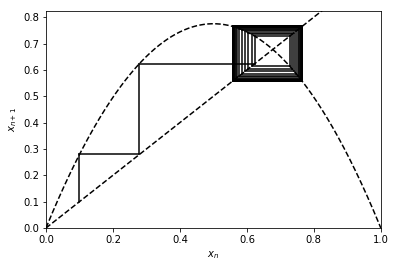

In [23]:
log_cobweb(.1,3.1,int(1e2))

So, we can also ask the question, given a fixed point, what points are attracted to it, and which points are repelled?  This can be rephrased as asking what is the _ basin of attraction _ for a fixed point $x_{\ast}$, where we define the basin of attraction $B(x_{\ast})$ as 

$$
B(x_{\ast}) = \left\{x\in\mathbb{R}: \lim_{n\rightarrow\infty}f^{(n)}(x) = x_{\ast} \right\}.
$$

In simple cases, we can come up with definitive answers.  For example, let 

$$
f(x) = ax + b.
$$

_ Problem _: Show for any $x_{0}\in\mathbb{R}$ that 

$$
f^{(n)}(x_{0}) = a^{n}x_{0} + \frac{a^{n}-1}{a-1}b
$$

For $a\neq 1$, we have the unique fixed point $x_{\ast} = b/(1-a)$.  For $|a|<1$, show that $B(x_{\ast})=\mathbb{R}$.  

Incidentally, if $a=1$, we see that

$$
f^{(n)}(x_{0}) = x_{0} + nb
$$

so clearly $a=1$ not only precludes fixed points, but we also just blow up.  However, if $a=-1$, we see that 

$$
f^{(n)}(x_{0}) = \left\{ 
\begin{array}{rl}
x_{0}, & n ~\mbox{even}\\
b-x_{0}, & n ~ \mbox{odd}
\end{array}
\right.
$$
